In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import models from skikit learn
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

# Model Evaluations
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load the data
df = pd.read_csv("student-mat.csv")

In [3]:
# Change "higher" column to binary numbers, yes=1 and no=0
df.replace(('yes', 'no'), (1, 0), inplace=True)

In [4]:
reduced_df = df[["Medu", "Fedu", "studytime", "failures", "higher", "Dalc", "Walc", "G1", "G2", "G3"]]

In [5]:
# Split data into x/y 
# X will be all columns EXCEPT target, so just drop target column
X = reduced_df.drop("G3", axis=1)
y = reduced_df["G3"]   # binary classification

# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Put models in a dictionary
models = { "Ridge": Ridge(),
         "RandomForest": RandomForestRegressor(),
         "LRegression": LinearRegression(),
         "ElasticNet": ElasticNet()}

# create a function to fit (train) and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels/targets)
    X_test: testing data (no labels)
    y_test: testing labels
    y_train: training labels
    """
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        # We'll save the name of the model(KNN, LogisticRegressions, RandomForest) to the model_scores empty 
        # dictionary as the key and the score as the value
        model_scores[name] = model.score(X_test, y_test)
    return model_scores  # will return a dictionary

In [7]:
model_scores = fit_and_score(models=models, 
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

In [8]:
# Let's check MSE and MAE to calculate the error
from sklearn.metrics import mean_absolute_error, mean_squared_error

# calculating the performance of the Random Forest Regression Model
rf = RandomForestRegressor(random_state=42)
rfModel = rf.fit(X_train, y_train)
y_pred_r = rfModel.predict(X_test)
mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)

In [9]:
# Let's start by trying to tune our RandomForestRegression model. 

# Set up two empty lists
train_scores = []
test_scores = []

# Create a list of different values for n_estimators  (default is 100)
estimators = range(100, 1000, 100)

# instantiate
rfr = RandomForestRegressor()

# Loop through the values
for i in estimators:
    rfr.set_params(n_estimators=i)
    
    # Fit the algorithm
    rfr.fit(X_train, y_train)
    
    # update the training scores list
    train_scores.append(rfr.score(X_train, y_train))
    
    # update test scores list
    test_scores.append(rfr.score(X_test, y_test))

In [10]:
# Let's test values for max_depth
# Set up two empty lists
train_scores_max_depth = []
test_scores_max_depth = []

# Create a list of different values for max_depth  (default is none)
estimators = range(1, 32)

# instantiate
rfr = RandomForestRegressor()

# Loop through the values
for i in estimators:
    rfr.set_params(max_depth=i)
    
    # Fit the algorithm
    rfr.fit(X_train, y_train)
    
    # update the training scores list
    train_scores_max_depth.append(rfr.score(X_train, y_train))
    
    # update test scores list
    test_scores_max_depth.append(rfr.score(X_test, y_test))

In [11]:
# Best hyperparameters for our model
param_grid = {  'max_depth': [24], 'max_features': ['auto', 'log2'], 'n_estimators': [500]}

rfr = RandomForestRegressor(random_state=1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5, verbose = True)

# Fit grid hyperparameter search model
g_search_train_model = g_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [12]:
g_search_test_model = g_search.score(X_test, y_test)

In [13]:
# calculating the performance of the TUNED Random Forest Regression Model
y_pred_r = g_search_train_model.predict(X_test)
mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)

In [14]:
import ipywidgets as widgets
from ipywidgets import Layout, HBox, Label

# Is there an event handler for these? How do we input all of the values selected into the model? 
# How can I format these so the entire description shows? HBox? VBox?
medu_dropdown = widgets.Dropdown(options=[('None', 1), ('Elementary School', 2), ('High School', 3), ('College', 4)],
                                value=2,
                                )

medu = HBox([Label('Mothers education level:'), medu_dropdown])

In [15]:
fedu_dropdown = widgets.Dropdown(
            options=[('None', 1), ('Elementary School', 2), ('High School', 3), ('College', 4)],
            value=2,
        )
fedu = HBox([Label('Fathers education level:'), fedu_dropdown])

In [16]:
studytime = widgets.Dropdown(
            options=[('Under two hours per week', 1), ('2-5 hours per week', 2), ('5-10 hours per week', 3), 
                     ('10+ hours per week', 4)],
            value=2,
        )
study = HBox([Label('Study time per week:'), studytime])

In [17]:
failures = widgets.Dropdown(
            options=[('Zero', 0), ('One', 1), ('Two', 2), ('Three or more', 3)],
            value=2,
        )
fail = HBox([Label('Number of class failures in your past:'), failures])

In [18]:
higher =  widgets.RadioButtons(
            options=[('Yes', 1), ('No', 0)],
            disabled=False
        )
high = HBox([Label('Do you plan to go to college?'), higher])

In [19]:
Dalc = widgets.Dropdown(
            options=[("I don't drink alcohol on weekdays", 1), ('One day per week', 2), ('Two days per week', 3), ('Three days per week', 4), ('Four or more days per week', 5)],
            value=2,
        )
dalc = HBox([Label('Weekday alcohol consumption'), Dalc])

In [20]:
Walc = widgets.Dropdown(options=[("No alchol", 1), ('Low alcohol', 2), ('Some alcohol', 3), 
                                       ('A lot of alcohol', 4), ('Consistently wasted', 5)],
            value=2,
        )
walc = HBox([Label('Weekend alcohol consumption'), Walc])

In [21]:
G1 = widgets.Select(
        options=[("A", 20), ('A-', 19), ('B+', 18), ('B', 17), ('B-', 16), ('C+', 15), ('C', 14), 
                 ('C-', 13), ('D+', 12), ('D', 11), ('D-', 10), ('F', 9)],
        # value='C',
        # rows=10,
        # description='First Period Grade:',
        disabled=False
    )
g1 = HBox([Label('First period grade:'), G1])

In [22]:
G2 = widgets.Select(
        options=[("A", 20), ('A-', 19), ('B+', 18), ('B', 17), ('B-', 16), ('C+', 15), ('C', 14), 
                 ('C-', 13), ('D+', 12), ('D', 11), ('D-', 10), ('F', 9)],
        # value='C',
        # rows=10,
        # description='Second Period Grade:',
        disabled=False
    )
g2 = HBox([Label('Second period grade:'), G2])

In [23]:
# Layout the widget
from ipywidgets import Button, HBox, VBox
title_text = widgets.HTML("<h3 class='text-center'><font color='green'>Student Performance Predictor</font><h3>")
student_parameters = VBox([medu, fedu, study, fail, high, dalc, walc, g1, g2])
student_parameters

In [24]:
# how to I change this to use the G3 input by the student and the studytime input by the student from the dropdown?
# How to create a dataframe from the values input by the students?
data={'Medu':[medu_dropdown.value],'Fedu':[fedu_dropdown.value],'studytime':[studytime.value],'failures':[failures.value],'higher':[higher.value],'Dalc':[Dalc.value],'Walc':[Walc.value],'G1':[G1.value],'G2':[G2.value]}
student_df=pd.DataFrame(data)
performance = g_search_train_model.predict(student_df)
performance[0]

19.024

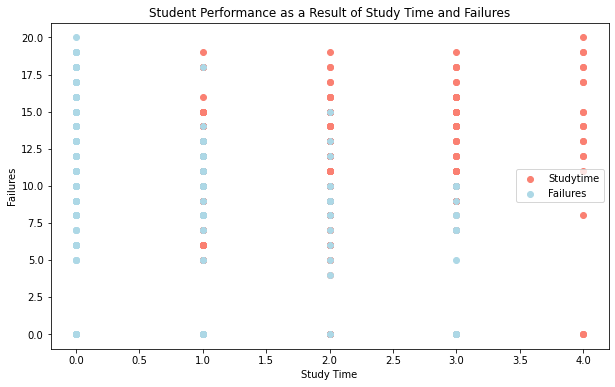

In [25]:
# Scatterplot of student performance prediction based on studytime and failures
plt.figure(figsize=(10, 6))

# scatter with positive correlation
plt.scatter(df.studytime,
           df.G3,
           c="salmon")

# Scatter plot with negative correlation
plt.scatter(df.failures,
           df.G3,
           c="lightblue")

# Add some helpful information
plt.title("Student Performance as a Result of Study Time and Failures")
plt.xlabel("Study Time")
plt.ylabel("Failures")
plt.legend(["Studytime", "Failures"]);

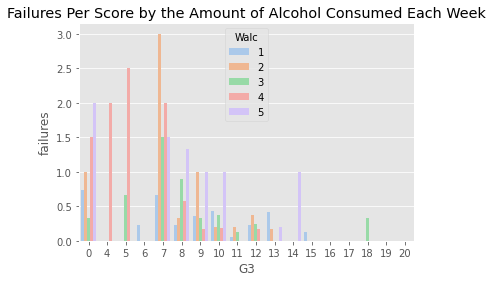

In [29]:
plt.style.use('ggplot')
sns.barplot(x='G3',y='failures',data=df,hue='Walc',palette='pastel', ci=None)
plt.title('Failures Per Score by the Amount of Alcohol Consumed Each Week')
plt.show()